# Car Type Classification


### Description
Train a ML model to predict the cost of insurance 

## Importing Libraries

Here we will import some useful Libraries such as `pandas`, `numpy`, `matplotlib` and `sklearn`

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

## Loading Data

Load data into dataframe so that it can be easily processed and analysed.

In [2]:
df = pd.read_csv('./data/insurance_sample.csv');
df_copy = pd.read_csv('./data/insurance_sample.csv');
df.head()

,id,_user_id,gender,driver_age,state,zip_code,vehicle_make,vehicle_cost_new,vehicle_year,vehicle_ownership,...,prov2name,prov3high,prov3low,prov3name,prov4high,prov4low,prov4name,prov5high,prov5low,prov5name
0,1,322256,MALE,43,TX,78701,Chevrolet,25000,2010,Impala,...,Safeco,115,101,Esurance,143,127,Travelers,111,98,Hartford
1,2,316440,MALE,43,KS,67005,Chevrolet,25000,2016,Impala,...,Safeco,130,114,Esurance,107,95,Travelers,138,121,Hartford
2,3,316549,MALE,43,KS,67846,Chevrolet,25000,2016,Impala,...,Safeco,139,122,Esurance,114,101,Travelers,141,123,Hartford
3,4,321183,MALE,43,MO,64506,Chevrolet,25000,2016,Impala,...,Safeco,138,122,Esurance,91,81,Travelers,135,119,Hartford
4,5,321188,MALE,43,IA,51534,Chevrolet,25000,2016,Impala,...,Safeco,141,124,Esurance,75,67,Travelers,106,93,Hartford


## Exploratory Data Analysis

Now we will do an EDA on the dataset to find out anamoly, null values and other discrepancies among the data.

In [3]:
df.shape

(14139, 39)

In [4]:
predictor = ['id', '_user_id', 'gender', 'driver_age', 'state', 'zip_code',
       'vehicle_make', 'vehicle_cost_new', 'vehicle_year', 'vehicle_ownership',
       'home_ownership', 'prior_carrier', 'prior_liability_limit',
       'first_name', 'marital_status', 'vehicle_model',
       'years_with_prior_carrier', 'years_licensed', 'driver_count',
       'vehicle_count', 'version', 'high', 'low']
target_variable = ['prov1high', 'prov1low',
        'prov2high', 'prov2low', 'prov3high',
       'prov3low',  'prov4high', 'prov4low',
       'prov5high', 'prov5low']

In [5]:
df.describe()

,id,_user_id,driver_age,zip_code,vehicle_cost_new,vehicle_year,years_with_prior_carrier,years_licensed,driver_count,vehicle_count,...,prov1high,prov1low,prov2high,prov2low,prov3high,prov3low,prov4high,prov4low,prov5high,prov5low
count,14139.000000,14139.000000,14139.0,14139.000000,14139.0,14139.000000,14139.0,14139.0,14139.0,14139.0,...,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000
mean,7070.000000,316680.468279,43.0,56455.630030,25000.0,2013.000000,10.0,20.0,1.0,1.0,...,101.145555,89.522314,92.367565,83.083386,134.669425,118.501804,112.736686,99.973195,133.528184,117.205319
std,4081.722063,4164.631912,0.0,26212.474584,0.0,2.449576,0.0,0.0,0.0,0.0,...,27.784020,24.591197,28.745667,25.856283,38.046573,33.495215,41.097616,36.454790,47.576136,41.763256
min,1.000000,309529.000000,43.0,7002.000000,25000.0,2010.000000,10.0,20.0,1.0,1.0,...,47.000000,42.000000,43.000000,39.000000,75.000000,66.000000,54.000000,47.000000,68.000000,59.000000
25%,3535.500000,313085.500000,43.0,33157.000000,25000.0,2010.000000,10.0,20.0,1.0,1.0,...,82.000000,73.000000,72.000000,65.000000,113.000000,100.000000,83.000000,73.000000,104.000000,91.000000
50%,7070.000000,316633.000000,43.0,53901.000000,25000.0,2013.000000,10.0,20.0,1.0,1.0,...,95.000000,84.000000,86.000000,77.000000,127.000000,112.000000,101.000000,90.000000,125.000000,110.000000
75%,10604.500000,320171.500000,43.0,79065.000000,25000.0,2016.000000,10.0,20.0,1.0,1.0,...,113.000000,100.000000,105.000000,94.500000,147.000000,130.000000,136.000000,121.000000,149.000000,131.000000
max,14139.000000,323966.000000,43.0,99403.000000,25000.0,2016.000000,10.0,20.0,1.0,1.0,...,231.000000,204.000000,234.000000,210.000000,348.000000,306.000000,243.000000,216.000000,470.000000,413.000000


We looked at some statistical information about the dataset. Now we will look at each and every column to analyse how it impacts the output variable and which one of them are not important to us.

In [6]:
df.apply(lambda x: sum(x.isnull()),axis=0)

id                          0
_user_id                    0
gender                      0
driver_age                  0
state                       0
zip_code                    0
vehicle_make                0
vehicle_cost_new            0
vehicle_year                0
vehicle_ownership           0
home_ownership              0
prior_carrier               0
prior_liability_limit       0
first_name                  0
last_name                   0
marital_status              0
vehicle_model               0
years_with_prior_carrier    0
years_licensed              0
driver_count                0
vehicle_count               0
version                     0
high                        0
low                         0
prov1high                   0
prov1low                    0
prov1name                   0
prov2high                   0
prov2low                    0
prov2name                   0
prov3high                   0
prov3low                    0
prov3name                   0
prov4high 

There are no null values present in the dataset but there are a bunch of columns which might not be useful for our model. Some of them have only single value in the column and one particular column has an outlier.

### Graphical Univariate Analysis

In this section we will look into the graphical representation of the data to collect some more information to support our goal.


We will also remove those columns which have only one unique value throughout a column.

In [7]:
colums_to_remove = []
for col in df.columns:
    if((len(df[col].unique()) == 1)):
        colums_to_remove.append(col)

Relationship between `vehicle_model` and `vehicle_ownership` is quite strange. Now we will look into if these columns are identical.

In [8]:
df[['vehicle_model','vehicle_ownership']]

,vehicle_model,vehicle_ownership
0,Impala,Impala
1,Impala,Impala
2,Impala,Impala
3,Impala,Impala
4,Impala,Impala
...,...,...
14134,Impala,Impala
14135,Impala,Impala
14136,Impala,Impala
14137,Impala,Impala


In [9]:
sum(df['vehicle_model'] == df['vehicle_ownership'])

14139

We will also remove the columns which have no significance to our classification model, which are `version`, `vehicle_model`, `id`, `_user_id`.

In [10]:
colums_to_remove.append('version'); #Because version is different at only one row and all other rows have same values
colums_to_remove.append('vehicle_model'); #Because vehicle model and vehicle ownership capture same information for all the records, so we will be keeping only one.
# ID columns have unique value for every row so they won't be  useful to us.
colums_to_remove.append('id'); 
colums_to_remove.append('_user_id');
colums_to_remove.append('high');
colums_to_remove.append('low');

Below is a full list of columns we are gonna be removing and columns that we will use for our classification model.

In [11]:
colums_to_remove

['gender',
 'driver_age',
 'vehicle_cost_new',
 'home_ownership',
 'prior_carrier',
 'prior_liability_limit',
 'first_name',
 'marital_status',
 'years_with_prior_carrier',
 'years_licensed',
 'driver_count',
 'vehicle_count',
 'prov1name',
 'prov2name',
 'prov3name',
 'prov4name',
 'prov5name',
 'version',
 'vehicle_model',
 'id',
 '_user_id',
 'high',
 'low']

In [12]:
predictor = [x for x in predictor if x not in colums_to_remove]
predictor

['state', 'zip_code', 'vehicle_make', 'vehicle_year', 'vehicle_ownership']

Now we will look into few histograms to study the pattern of some properties.

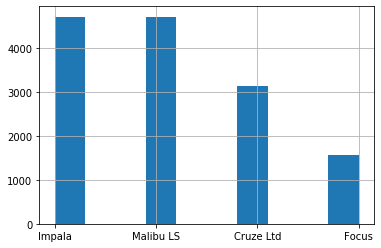

In [13]:
df['vehicle_model'].hist()

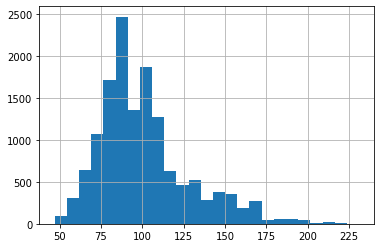

In [14]:
df['prov1high'].hist(bins=25)

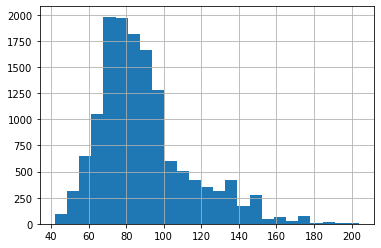

In [15]:
df['prov1low'].hist(bins=25)

## Data Preprocessing

In this part we will be preparing our data for the model training.


First of all we need to convert categorical properties to numerical ones so that these can be used within our model. We are gonna create dummy properties to capture all the information represented by the categorical variables.

In [16]:
categorical_variables = ['state', 'zip_code', 'vehicle_make', 'vehicle_year', 'vehicle_ownership']

In [17]:
df = df[predictor + target_variable].copy()

In [18]:
df

,state,zip_code,vehicle_make,vehicle_year,vehicle_ownership,prov1high,prov1low,prov2high,prov2low,prov3high,prov3low,prov4high,prov4low,prov5high,prov5low
0,TX,78701,Chevrolet,2010,Impala,84,74,88,80,115,101,143,127,111,98
1,KS,67005,Chevrolet,2016,Impala,103,91,103,92,130,114,107,95,138,121
2,KS,67846,Chevrolet,2016,Impala,114,101,106,95,139,122,114,101,141,123
3,MO,64506,Chevrolet,2016,Impala,97,86,95,86,138,122,91,81,135,119
4,IA,51534,Chevrolet,2016,Impala,66,59,90,81,141,124,75,67,106,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,NE,68310,Chevrolet,2013,Impala,93,82,97,87,127,111,153,135,129,113
14135,NE,68818,Chevrolet,2013,Impala,93,82,97,87,127,111,153,135,129,113
14136,NE,68787,Chevrolet,2013,Impala,93,82,97,87,127,111,153,135,129,113
14137,NE,68601,Chevrolet,2013,Impala,93,82,97,87,127,111,153,135,129,113


In [19]:
dum_df = pd.get_dummies(df, columns=categorical_variables)
dum_df.head()

,prov1high,prov1low,prov2high,prov2low,prov3high,prov3low,prov4high,prov4low,prov5high,prov5low,...,zip_code_99403,vehicle_make_Chevrolet,vehicle_make_Ford,vehicle_year_2010,vehicle_year_2013,vehicle_year_2016,vehicle_ownership_Cruze Ltd,vehicle_ownership_Focus,vehicle_ownership_Impala,vehicle_ownership_Malibu LS
0,84,74,88,80,115,101,143,127,111,98,...,0,1,0,1,0,0,0,0,1,0
1,103,91,103,92,130,114,107,95,138,121,...,0,1,0,0,0,1,0,0,1,0
2,114,101,106,95,139,122,114,101,141,123,...,0,1,0,0,0,1,0,0,1,0
3,97,86,95,86,138,122,91,81,135,119,...,0,1,0,0,0,1,0,0,1,0
4,66,59,90,81,141,124,75,67,106,93,...,0,1,0,0,0,1,0,0,1,0


Now we will extract the features or descriptors which are being used to train the model

In [20]:
dum_df_predictor = dum_df.drop(target_variable, axis=1)

In [21]:
dum_df_predictor

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_DC,state_FL,state_GA,state_IA,state_ID,...,zip_code_99403,vehicle_make_Chevrolet,vehicle_make_Ford,vehicle_year_2010,vehicle_year_2013,vehicle_year_2016,vehicle_ownership_Cruze Ltd,vehicle_ownership_Focus,vehicle_ownership_Impala,vehicle_ownership_Malibu LS
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
14135,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
14136,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
14137,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


We will use a label encoder from sklearn llibrary to create those dummy variables.

In [22]:
dum_df_target = dum_df[target_variable]

In [23]:
dum_df_target

,prov1high,prov1low,prov2high,prov2low,prov3high,prov3low,prov4high,prov4low,prov5high,prov5low
0,84,74,88,80,115,101,143,127,111,98
1,103,91,103,92,130,114,107,95,138,121
2,114,101,106,95,139,122,114,101,141,123
3,97,86,95,86,138,122,91,81,135,119
4,66,59,90,81,141,124,75,67,106,93
...,...,...,...,...,...,...,...,...,...,...
14134,93,82,97,87,127,111,153,135,129,113
14135,93,82,97,87,127,111,153,135,129,113
14136,93,82,97,87,127,111,153,135,129,113
14137,93,82,97,87,127,111,153,135,129,113


## Model Training

We will be dividing the dataset into two sets Training and Test dataset with the ratio of 70:30.
As we have to predict the continuous variable insurance, so a linear regression model was trained on the extracted descriptors to predict the cost of insurance

Splitting the data into training and test dataset.

In [24]:
data, X_test, target, y_test = train_test_split(dum_df_predictor,dum_df_target, shuffle=True, test_size=0.3, random_state=15)

Training the Linear regression model from sklearn

In [25]:
# importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
model.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Getting the predictions from the model on the unseen dataset

In [26]:
# Predicting the target variable for test datset
predictions = model.predict(X_test)

In [34]:
X_test

,state_AL,state_AR,state_AZ,state_CA,state_CO,state_DC,state_FL,state_GA,state_IA,state_ID,...,zip_code_99403,vehicle_make_Chevrolet,vehicle_make_Ford,vehicle_year_2010,vehicle_year_2013,vehicle_year_2016,vehicle_ownership_Cruze Ltd,vehicle_ownership_Focus,vehicle_ownership_Impala,vehicle_ownership_Malibu LS
1652,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
2297,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3291,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8784,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
8399,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
11687,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4439,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2152,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
Comparing the predictions by the model with the actual values

In [39]:
predictions[:,0]

array([113.375  , 190.625  ,  67.15625, ...,  99.96875,  85.375  ,
        93.65625])

In [41]:
y_test['prov1high']

1652     114
2297     194
3291      68
8784     188
8399      88
        ... 
2111      88
11687    121
4439     101
2152      85
10551     93
Name: prov1high, Length: 4242, dtype: int64

In [42]:
predictions[:,1]

array([100.125  , 168.8125 ,  59.6875 , ...,  89.09375,  75.78125,
        82.78125])

In [43]:
y_test['prov1low']

1652     101
2297     172
3291      60
8784     167
8399      78
        ... 
2111      78
11687    107
4439      90
2152      76
10551     82
Name: prov1low, Length: 4242, dtype: int64

Saving the predictions in the csv format

In [37]:
from numpy import asarray
from numpy import savetxt
savetxt('predictions.csv', predictions, delimiter=',')

In [29]:
y_test.head()

,prov1high,prov1low,prov2high,prov2low,prov3high,prov3low,prov4high,prov4low,prov5high,prov5low
1652,114,101,126,113,164,144,135,119,169,148
2297,194,172,141,127,154,135,155,138,219,192
3291,68,60,65,59,122,108,67,59,80,70
8784,188,167,142,127,136,119,221,196,191,168
8399,88,78,81,73,109,96,101,90,113,99


To compare the predictions with the actual values, a scatter plot has been plotted to get the overall idea how well the model 
is performing on the unseen dataset.

Text(0, 0.5, 'Predicted Y')

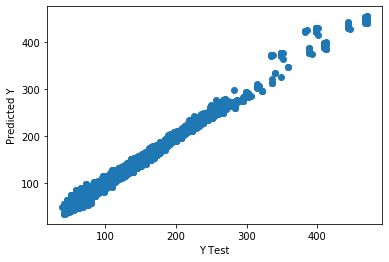

In [279]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

After running the model on the unseen dataset to get predictions, it is concluded from the above plot that the model predicitons of cost of insurance are quite close in comparison to original values. There is a great scope to tune this model with more data to get more accuracte predictions.

In [44]:
dump(model, 'Carinsuranceprediction.joblib')

['Carinsuranceprediction.joblib']